# Using Keras

In [1]:
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential # Sequential class from Keras, which is used to create models that stack layers sequentially.
from keras.layers import Dense, Dropout, Flatten # Dense creates a fully connected layer, Dropout adds regularization to prevent overfitting, and Flatten is used to flatten input tensors.
from keras.layers import Conv2D, MaxPooling2D # Conv2D creates a 2D convolutional layer, which is used to extract features from images, and MaxPooling2D is used for downsampling and reducing the spatial dimensions of the feature maps.
from keras.callbacks import CSVLogger, EarlyStopping # CSVLogger logs training and validation metrics to a CSV file, and EarlyStopping is used to stop training early if the validation loss doesn't improve for a certain number of epochs
from keras.datasets import mnist #  imports the MNIST dataset from Keras, which is a popular dataset of handwritten digits used for image classification.

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

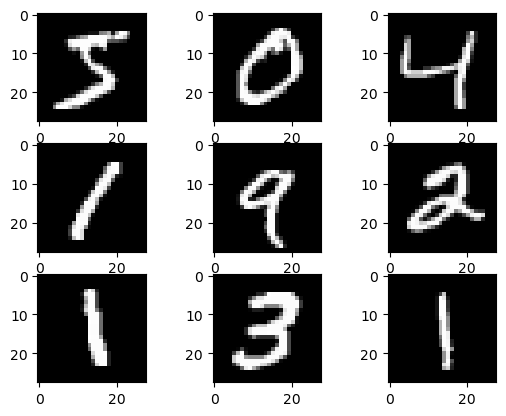

In [3]:
for i in range(9): #running the loop for first 9 images 
    plt.subplot(330+1+i) #defining subplot 
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray')) #setting the colormap to gray
plt.show()

In [4]:
# Reshape the input data to fit the CNN model
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [5]:
# Convert the labels to categorical values
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [6]:
# Define the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape)) 
# This line adds a 2D convolutional layer to the model with 32 filters, a kernel size of 3x3, and a ReLU activation function.
#input_shape should be a tuple indicating the shape of the input data, e.g. (28, 28, 1) for MNIST images.
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [7]:
# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [8]:
# Define the callbacks
csv_logger = CSVLogger('keras_mnist.csv')
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [10]:
# Train the model
batch_size = 128
epochs = 20
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test),
                    callbacks=[csv_logger, early_stopping])

Epoch 1/20
469/469 [==============================] - 39s 82ms/step - loss: 1.9703 - accuracy: 0.3543 - val_loss: 1.6232 - val_accuracy: 0.4738
Epoch 2/20
469/469 [==============================] - 40s 85ms/step - loss: 1.8958 - accuracy: 0.3763 - val_loss: 1.5580 - val_accuracy: 0.5064
Epoch 3/20
469/469 [==============================] - 40s 84ms/step - loss: 1.8564 - accuracy: 0.3857 - val_loss: 1.4971 - val_accuracy: 0.5332
Epoch 4/20
469/469 [==============================] - 40s 85ms/step - loss: 1.7940 - accuracy: 0.4051 - val_loss: 1.4275 - val_accuracy: 0.5566
Epoch 5/20
469/469 [==============================] - 40s 85ms/step - loss: 1.7590 - accuracy: 0.4212 - val_loss: 1.3638 - val_accuracy: 0.5790
Epoch 6/20
469/469 [==============================] - 39s 83ms/step - loss: 1.7023 - accuracy: 0.4378 - val_loss: 1.2866 - val_accuracy: 0.6140
Epoch 7/20
469/469 [==============================] - 40s 85ms/step - loss: 1.6802 - accuracy: 0.4466 - val_loss: 1.2342 - val_accuracy:

In [12]:
# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.7412694692611694
Test accuracy: 0.8155999779701233


# Using TensorFlow 

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping
from tensorflow.keras.datasets import mnist

In [14]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [15]:
# Reshape the input data to fit the CNN model
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)


In [16]:
# Convert the labels to categorical values
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [17]:
# Define the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [18]:
#Compile the model
model.compile(loss=tf.keras.losses.categorical_crossentropy,
optimizer=tf.keras.optimizers.Adadelta(),
metrics=['accuracy'])

In [19]:
#Define the callbacks
csv_logger = CSVLogger('keras_mnist.csv')
early_stopping = EarlyStopping(patience=5)

In [22]:
#Train the model
batch_size = 128
epochs = 20
model.fit(x_train, y_train,
batch_size=batch_size,
epochs=epochs,
verbose=1,
validation_split=0.2,
callbacks=[csv_logger, early_stopping])

Epoch 1/20
375/375 [==============================] - 69s 183ms/step - loss: 1.7532 - accuracy: 0.4502 - val_loss: 1.2313 - val_accuracy: 0.6550
Epoch 2/20
375/375 [==============================] - 110s 294ms/step - loss: 1.6913 - accuracy: 0.4639 - val_loss: 1.1815 - val_accuracy: 0.6731
Epoch 3/20
375/375 [==============================] - 113s 301ms/step - loss: 1.6255 - accuracy: 0.4854 - val_loss: 1.1070 - val_accuracy: 0.6951
Epoch 4/20
375/375 [==============================] - 114s 303ms/step - loss: 1.5618 - accuracy: 0.5033 - val_loss: 1.0392 - val_accuracy: 0.7200
Epoch 5/20
375/375 [==============================] - 114s 305ms/step - loss: 1.5197 - accuracy: 0.5211 - val_loss: 0.9907 - val_accuracy: 0.7336
Epoch 6/20
375/375 [==============================] - 115s 306ms/step - loss: 1.4741 - accuracy: 0.5386 - val_loss: 0.9429 - val_accuracy: 0.7719
Epoch 7/20
375/375 [==============================] - 116s 309ms/step - loss: 1.4301 - accuracy: 0.5551 - val_loss: 0.8941 - 

In [23]:
#Evaluate the model on the test dataset
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5319828391075134
Test accuracy: 0.8690999746322632


# Using Pytorch

In [28]:
pip install torchvision

     ---------------------------------------- 1.1/1.1 MB 2.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [79]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [80]:
# Define the network
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x



In [81]:
# Set up the training data
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)


Files already downloaded and verified


In [82]:
# Define the training function
def train(model, criterion, optimizer, train_loader, device):
    model.train()
    for data, target in train_loader:
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

In [83]:
# Set up the device and the model
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = Net().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)


In [84]:
# Train the model
for epoch in range(10):
    train(model, criterion, optimizer, train_loader, device)


# 2

In [48]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = mnist.load_data()
    # reshape dataset to have a single channel
    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
    testX = testX.reshape((testX.shape[0], 28, 28, 1))
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

In [41]:
def pixel_prep(train, test):
    # convert dtypes
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize the images 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm


In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD

def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [50]:
from sklearn.model_selection import KFold

def evaluate_model(dataX, dataY, n_folds=5):
    scores, histories = list(), list()
    # prepare cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    # enumerate splits
    for train_ix, test_ix in kfold.split(dataX):
        # define model
        model = define_model()
        # select rows for train and test
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        # fit model
        history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
        # evaluate model
        _, acc = model.evaluate(testX, testY, verbose=0)
        print('> %.3f' % (acc * 100.0))
        # append scores
        scores.append(acc)
        histories.append(history)
    return scores, histories


In [51]:
# plot diagnostic learning curves
def summarize(histories):
    for i in range(len(histories)):
        # plot loss
        plt.subplot(211)
        plt.title('Cross Entropy Loss')
        plt.plot(histories[i].history['loss'], color='blue', label='train')
        plt.plot(histories[i].history['val_loss'], color='black', label='test')
        # plot accuracy
        plt.subplot(212)
        plt.title('Classification Accuracy')
        plt.plot(histories[i].history['accuracy'], color='blue', label='train')
        plt.plot(histories[i].history['val_accuracy'], color='black', label='test')
        plt.show()


In [55]:
# summarize model performance
def summarize_perf(scores):
    # print summary
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
    # box and whisker plots of results
    plt.boxplot(scores)
    plt.show()

In [56]:
# run the test harness for evaluating a model
def run_test_harness():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = pixel_prep(trainX, testX)
    # evaluate model
    scores, histories = evaluate_model(trainX, trainY)
    # learning curves
    summarize(histories)
    # summarize estimated performance
    summarize_perf(scores)


> 98.642
> 98.700
> 98.617
> 98.783
> 98.725


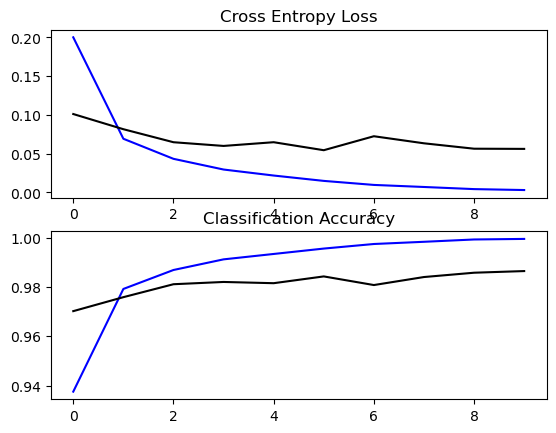

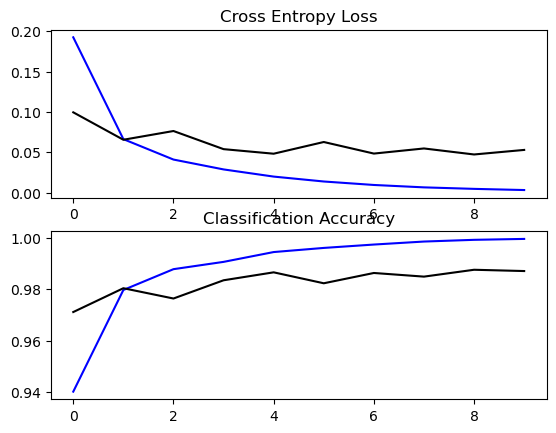

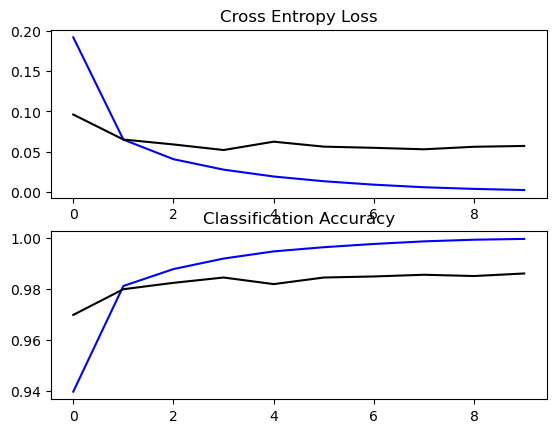

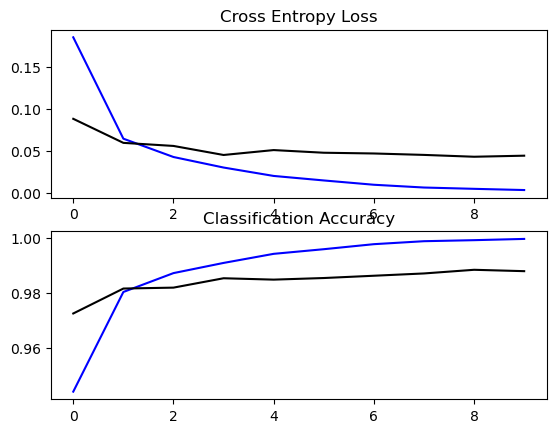

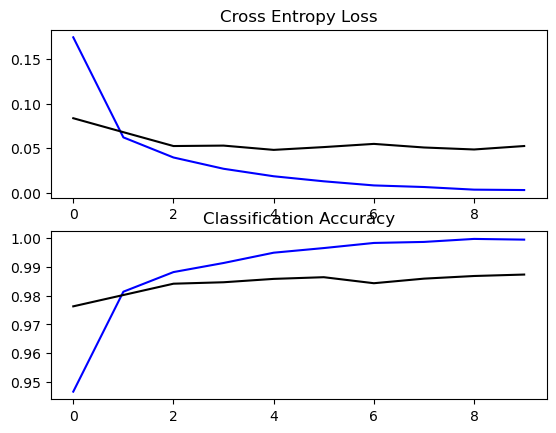

Accuracy: mean=98.693 std=0.059, n=5


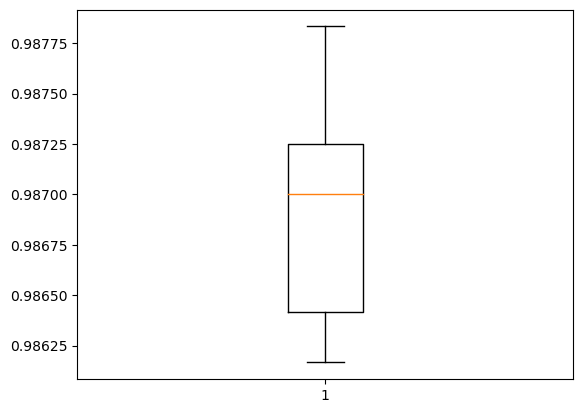

In [57]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.optimizers import SGD
from sklearn.model_selection import KFold
from numpy import mean, std
import matplotlib.pyplot as plt
# entry point, run the test harness
run_test_harness()